In [1]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score,mean_squared_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [3]:
df=pd.read_csv('./heart.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


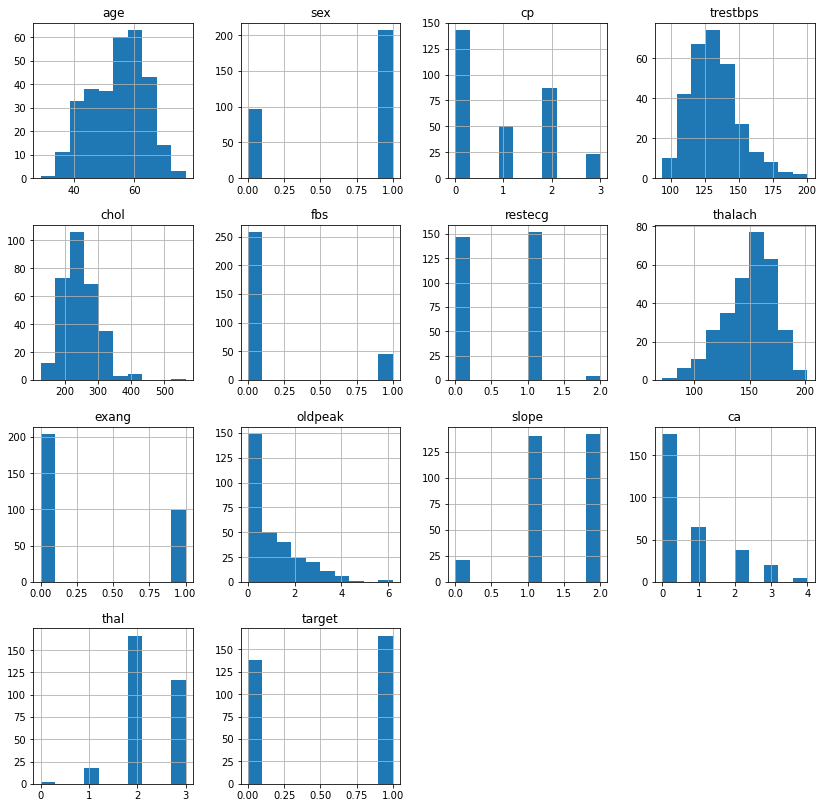

In [4]:
df.hist(figsize=(14,14))
plt.show()

## Data Preprocessing

In [6]:
# seperate dependent and independent feature
y = df["target"]
X = df.drop(["target"], axis = 1)

In [7]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [8]:
# Split the data into train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=10,test_size=0.2,shuffle=True)

## K-NearestNeighbor

In [9]:
# For model.fit() approach

knn_scores = []
for k in range(1,21):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    knn_classifier.fit(X_train, y_train)
    prediction_knn = knn_classifier.predict(X_test)
    test_acc = accuracy_score(prediction_knn, y_test)
    knn_scores.append(round(test_acc,4))

In [10]:
knn_scores

[0.5902,
 0.6557,
 0.5738,
 0.6393,
 0.5902,
 0.7377,
 0.7049,
 0.6885,
 0.6885,
 0.6721,
 0.6721,
 0.6721,
 0.6721,
 0.6393,
 0.6721,
 0.6885,
 0.6885,
 0.7049,
 0.7049,
 0.7049]

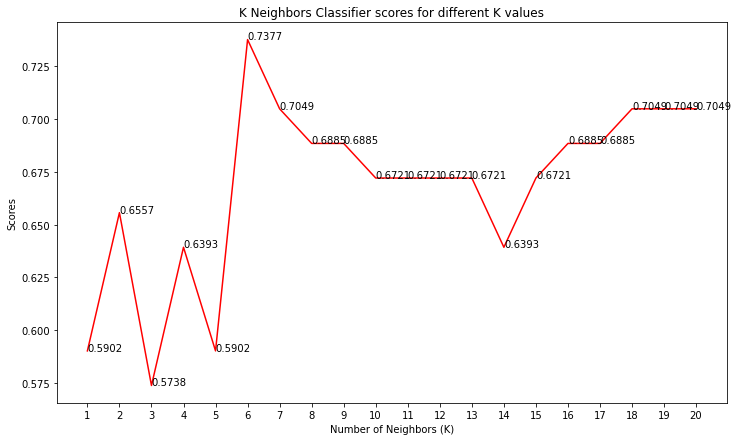

In [11]:
plt.figure(figsize=(12,7))
plt.plot([k for k in range(1,21)], knn_scores, color = "red")
# plt.plot(knn_scores, color = "red")
for i in range(1, 21):
#     plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
    plt.text(i, knn_scores[i-1], (knn_scores[i-1]))
plt.xticks([i for i in range(1, 21)])
plt.xlabel("Number of Neighbors (K)")
plt.ylabel("Scores")
plt.title("K Neighbors Classifier scores for different K values")
plt.show()

In [14]:
# Training the KNN model by fitting X_train, y_train

knn_classifier = KNeighborsClassifier(n_neighbors=6)
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=6)

In [15]:
# Predicting for the testing dataset
prediction_knn = knn_classifier.predict(X_test)
testing_acc = accuracy_score(prediction_knn, y_test)
testing_acc

0.7377049180327869

In [16]:
# Predicting for the training dataset
prediction_knn = knn_classifier.predict(X_train)
training_acc = accuracy_score(prediction_knn, y_train)
training_acc

0.7520661157024794

## Decision Tree

In [17]:
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [18]:
# Predicting for the testing dataset
prediction_df = dt_classifier.predict(X_test)
testing_acc = accuracy_score(prediction_df, y_test)
testing_acc

0.7540983606557377

In [25]:
X_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
183,58,1,2,112,230,0,0,165,0,2.5,1,1,3
229,64,1,2,125,309,0,1,131,1,1.8,1,0,3
126,47,1,0,112,204,0,1,143,0,0.1,2,0,2
184,50,1,0,150,243,0,0,128,0,2.6,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,57,1,1,124,261,0,1,141,0,0.3,2,0,3
121,59,1,0,138,271,0,0,182,0,0.0,2,0,2
187,54,1,0,124,266,0,0,109,1,2.2,1,1,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [19]:
# Predicting for the training dataset
prediction_df = dt_classifier.predict(X_train)
training_acc = accuracy_score(prediction_df, y_train)
training_acc

1.0

## Confusion Matrix

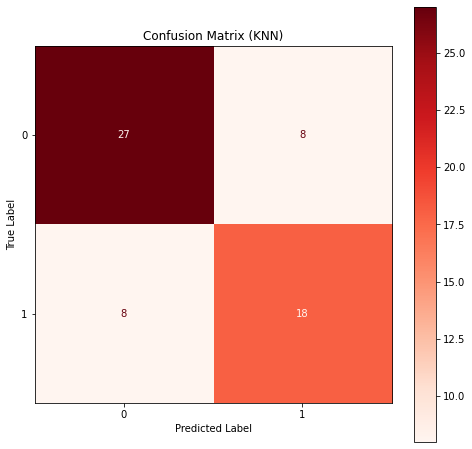

In [23]:
from sklearn.metrics import plot_confusion_matrix

matrix = plot_confusion_matrix(knn_classifier, X_test, y_test, cmap=plt.cm.Reds)
matrix.ax_.set_title('Confusion Matrix (KNN)', color='black')
plt.xlabel('Predicted Label', color='black')
plt.ylabel('True Label', color='black')
# plt.gcf().axes[0].tick_params(colors='white')
# plt.gcf().axes[1].tick_params(colors='white')
plt.gcf().set_size_inches(8,8)
plt.show()

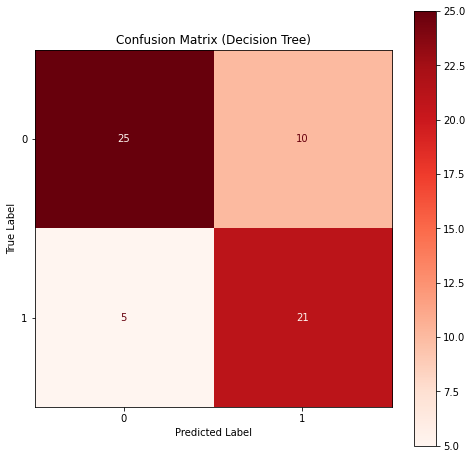

In [24]:
matrix = plot_confusion_matrix(dt_classifier, X_test, y_test, cmap=plt.cm.Reds)
matrix.ax_.set_title('Confusion Matrix (Decision Tree)', color='black')
plt.xlabel('Predicted Label', color='black')
plt.ylabel('True Label', color='black')
# plt.gcf().axes[0].tick_params(colors='white')
# plt.gcf().axes[1].tick_params(colors='white')
plt.gcf().set_size_inches(8,8)
plt.show()

## Predict on Custom Data

In [20]:
input_data = (41, 0, 1, 130, 204, 0, 0, 172, 0, 1.4, 2, 0, 2)
input_data_numpy = np.asarray([input_data])
input_data_numpy

array([[ 41. ,   0. ,   1. , 130. , 204. ,   0. ,   0. , 172. ,   0. ,
          1.4,   2. ,   0. ,   2. ]])

In [21]:
# Prediction using Decision Tree
prediction = dt_classifier.predict(input_data_numpy)
prediction

array([1], dtype=int64)

In [22]:
# Prediction using KNN
prediction = knn_classifier.predict(input_data_numpy)
prediction

array([1], dtype=int64)